### Importar las librerías a utilizar

In [28]:
import pandas as pd
#from pandas_profiling import ProfileReport   # para versiones Python < 3.11
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Leer archivo de datos

In [29]:
datos = pd.read_csv("titanic3.csv")

In [30]:
datos.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [31]:
datos.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [32]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [33]:
datos.shape

(1309, 14)

## Ejemplos de uso de Seaborn para explorar los datos

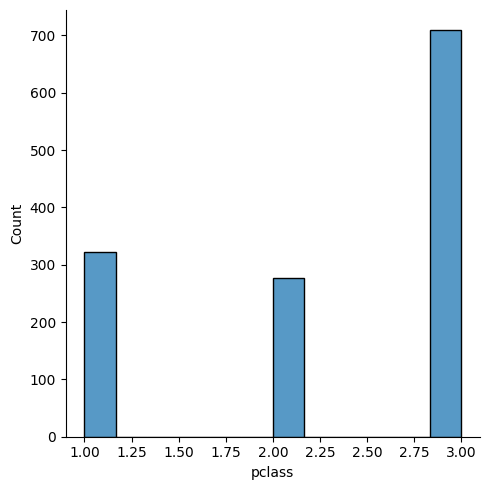

In [34]:
sns.displot(datos['pclass'])

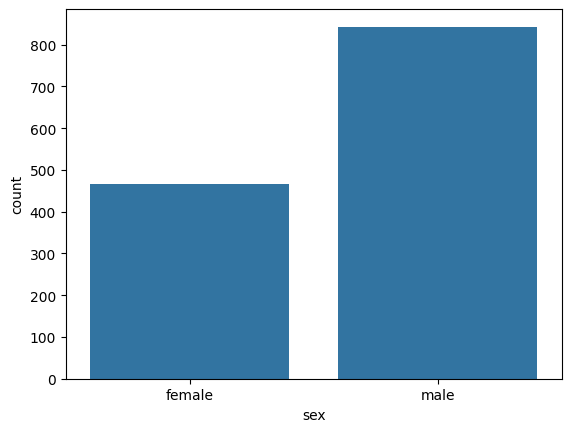

In [35]:
sns.countplot(x = 'sex', data = datos);

### Pura Magia

In [36]:
profile = ProfileReport(datos)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


Toda la información que nos da este reporte, la podemos obtener directamente con instrucciones de Pandas...obviamente, es mucho más simple dar una sola instrucción.

### Conocemos los datos y ahora qué hacer para prepararlos (limpiarlos)?

Pandas tiene todas las instrucciones para:
1.  estandarizar los nombres de las variables
2.  eliminar datos faltantes
3.  eliminar registros duplicados
4.  crear nuevas variables
5.  etc.


###  Eliminar columnas

La columna "body" normalmente no nos será útil, eliminémosla

In [37]:
datos.drop("body", axis=1, inplace=True)

print(datos.columns)


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'home.dest'],
      dtype='object')


### Cambiar el tipo de algunos datos

Varias de las columnas son categóricas, habrá que codificarlas

In [38]:
from sklearn.preprocessing import LabelEncoder

variables_categoricas = ['sex', 'cabin', 'embarked', 'boat', 'home.dest']
label_encoders = {}

for col in variables_categoricas:
    label_encoders[col] = LabelEncoder()
    datos[col] = label_encoders[col].fit_transform(datos[col].astype(str))

In [51]:
datos.head(100)


pclass  survived                                             name  sex  \
0         1         1                    Allen, Miss. Elisabeth Walton    0   
1         1         1                   Allison, Master. Hudson Trevor    1   
2         1         0                     Allison, Miss. Helen Loraine    0   
3         1         0             Allison, Mr. Hudson Joshua Creighton    1   
4         1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0   
..      ...       ...                                              ...  ...   
104       1         1                   Eustis, Miss. Elizabeth Mussey    0   
105       1         0                         Evans, Miss. Edith Corse    0   
109       1         1                 Flynn, Mr. John Irwin ("Irving")    1   
110       1         0                  Foreman, Mr. Benjamin Laventall    1   
111       1         1                   Fortune, Miss. Alice Elizabeth    0   

         age  sibsp  parch    ticket      fare  cabin  embarked  boat  \
0    29.0000      0      0     24160  211.3375     43         2    11   
1     0.9167      1      2    113781  151.5500     79         2     2   
2     2.0000      1      2    113781  151.5500     79         2    27   
3    30.0000      1      2    113781  151.5500     79         2    27   
4    25.0000      1      2    113781  151.5500     79         2    27   
..       ...    ...    ...       ...       ...    ...       ...   ...   
104  54.0000      1      0     36947   78.2667    123         0    13   
105  36.0000      0      0  PC 17531   31.6792     11         0    27   
109  36.0000      0      0  PC 17474   26.3875    153         2    14   
110  30.0000      0      0    113051   27.7500     67         0    27   
111  24.0000      3      2     19950  263.0000     80         2     1   

     home_dest  
0          308  
1          230  
2          230  
3          230  
4          230  
..         ...  
104         47  
105        236  
109         48  
110        236  
111        361  

[100 rows x 13 columns]

### Estandarizar los nombres de las columnas:

In [52]:
import pandas as pd
import re

def estandarizar_nombre(col):
    col = col.lower()  
    col = col.replace('.', '_')  
    col = re.sub(r'[^a-z0-9_]', '', col)  
    return col

datos.columns = [estandarizar_nombre(col) for col in datos.columns]

print(datos.columns)


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'home_dest'],
      dtype='object')


### Eliminar filas duplicadas

In [53]:
datos = datos.drop_duplicates()
print(datos)

      pclass  survived                                             name  sex  \
0          1         1                    Allen, Miss. Elisabeth Walton    0   
1          1         1                   Allison, Master. Hudson Trevor    1   
2          1         0                     Allison, Miss. Helen Loraine    0   
3          1         0             Allison, Mr. Hudson Joshua Creighton    1   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0   
...      ...       ...                                              ...  ...   
1301       3         0                             Youseff, Mr. Gerious    1   
1304       3         0                             Zabour, Miss. Hileni    0   
1306       3         0                        Zakarian, Mr. Mapriededer    1   
1307       3         0                              Zakarian, Mr. Ortin    1   
1308       3         0                               Zimmerman, Mr. Leo    1   

          age  sibsp  parch  ticket    

### Reemplazar valores faltantes

### Eliminar filas con valores faltantes

In [54]:
datos = datos.dropna()
print(datos)

      pclass  survived                                             name  sex  \
0          1         1                    Allen, Miss. Elisabeth Walton    0   
1          1         1                   Allison, Master. Hudson Trevor    1   
2          1         0                     Allison, Miss. Helen Loraine    0   
3          1         0             Allison, Mr. Hudson Joshua Creighton    1   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0   
...      ...       ...                                              ...  ...   
1301       3         0                             Youseff, Mr. Gerious    1   
1304       3         0                             Zabour, Miss. Hileni    0   
1306       3         0                        Zakarian, Mr. Mapriededer    1   
1307       3         0                              Zakarian, Mr. Ortin    1   
1308       3         0                               Zimmerman, Mr. Leo    1   

          age  sibsp  parch  ticket    

### Explorar los datos numéricos

Realizar Boxplots para cada uno

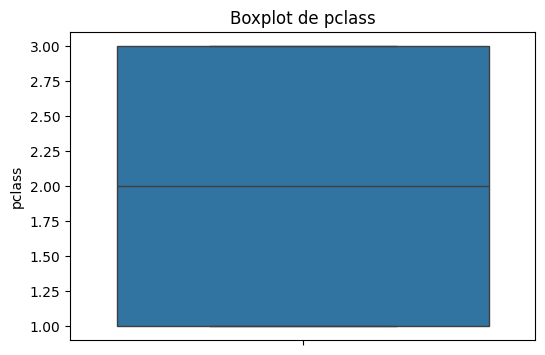

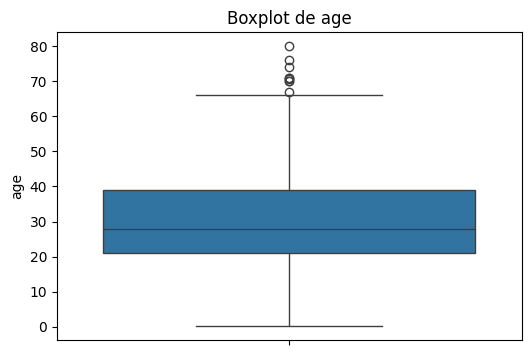

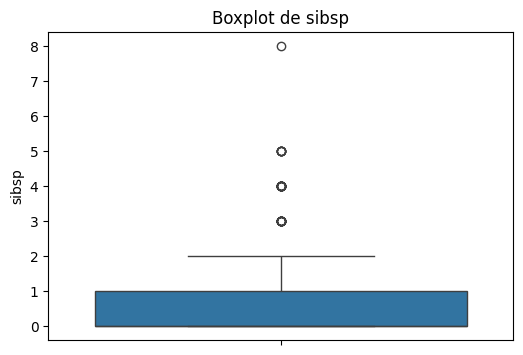

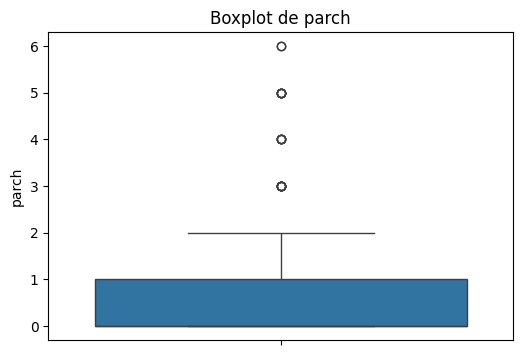

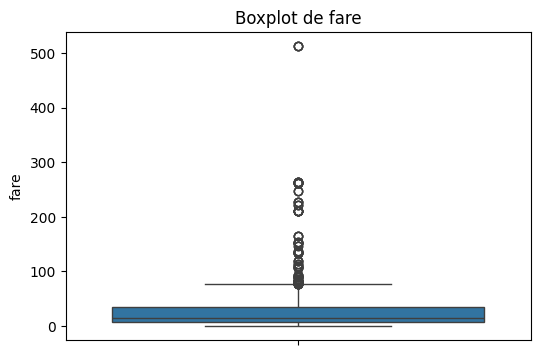

In [56]:

columnas_numericas = ["pclass", "age", "sibsp", "parch", "fare"]

for col in columnas_numericas:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(y=datos[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


### Explorar los datos categóricos

Realizar gráficas de barras ej. de survived, sex

/var/folders/7v/fnx495qx7zqd77glm78ts93r0000gn/T/ipykernel_9344/1955730844.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette="pastel")


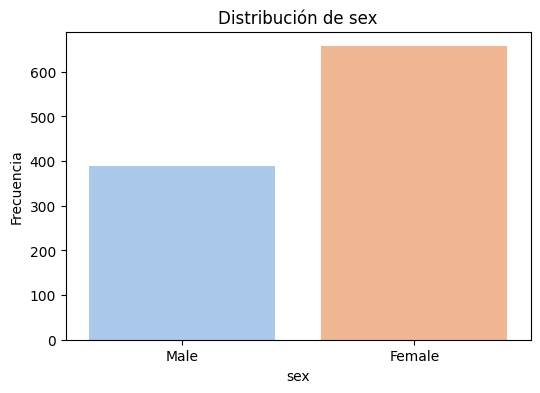

/var/folders/7v/fnx495qx7zqd77glm78ts93r0000gn/T/ipykernel_9344/1955730844.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette="pastel")


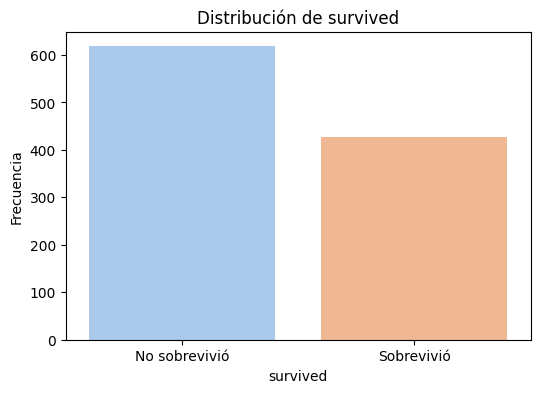

In [68]:
columnas = {
    "sex": {0: "Male", 1: "Female"},
    "survived": {0: "No sobrevivió", 1: "Sobrevivió"}
}

for columna, etiquetas in columnas.items():
    conteo = datos[columna].value_counts()

    plt.figure(figsize=(6, 4))
    sns.barplot(x=conteo.index, y=conteo.values, palette="pastel")

    plt.xticks(ticks=conteo.index, labels=[etiquetas[val] for val in conteo.index])

    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")

    plt.show()


Contrastar variables categóricas, por ej. survived vs sex con gráfica de barras apiladas (stacked)

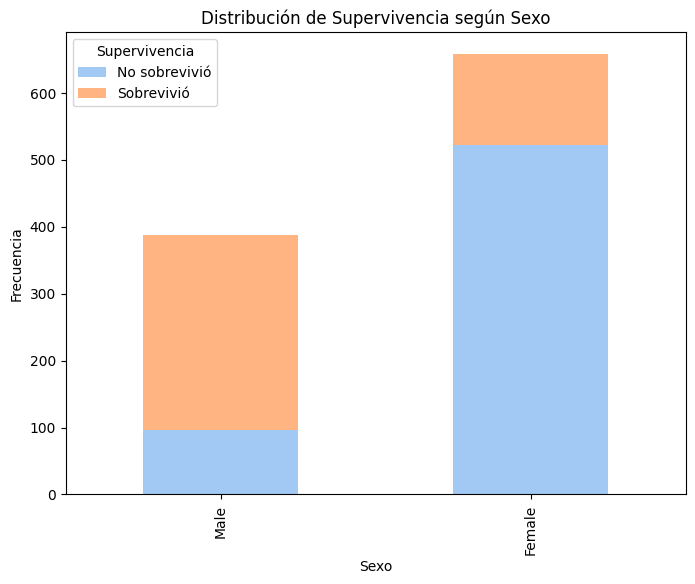

In [71]:
categorias_genero = {0: "Male", 1: "Female"}
categorias_supervivencia = {0: "No sobrevivió", 1: "Sobrevivió"}

conteo_variables = pd.crosstab(datos["sex"], datos["survived"])

conteo_variables.index = conteo_variables.index.map(categorias_genero)
conteo_variables.columns = conteo_variables.columns.map(categorias_supervivencia)

colores = sns.color_palette("pastel")

conteo_variables.plot(kind="bar", stacked=True, figsize=(8, 6), color=colores)

plt.title("Distribución de Supervivencia según Sexo")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")
plt.legend(title="Supervivencia")

plt.show()


### Reducir la cardinalidad

Pueden haber columas con datos categóricos demasiados variados, se podría poner un límite de frecuencia de una categoría y las que no cumplen cambiarles a un valor ötros", o algo así

home_dest
369      360
Otros    203
236       55
196       14
229       10
        ... 
290        2
303        2
57         2
106        2
46         2
Name: count, Length: 147, dtype: int64


### Eliminar datos atípicos

In [4]:
import pandas as pd

df = pd.read_csv("titanic3.csv")  

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\n🔎 Outliers detectados en '{column}':")
    print(f"Límite inferior: {lower_bound}, Límite superior: {upper_bound}")
    print(f"Número de outliers: {outliers.shape[0]}")
    print(outliers[[column]])  
    
    return outliers  

columnas_numericas = ["age", "sibsp", "fare"]

outliers_dict = {}
for col in columnas_numericas:
    outliers_dict[col] = detect_outliers(df, col)



🔎 Outliers detectados en 'age':
Límite inferior: -6.0, Límite superior: 66.0
Número de outliers: 9
       age
9     71.0
14    80.0
61    76.0
81    70.0
135   71.0
285   67.0
506   70.0
727   70.5
1235  74.0

🔎 Outliers detectados en 'sibsp':
Límite inferior: -1.5, Límite superior: 2.5
Número de outliers: 57
      sibsp
111       3
112       3
113       3
114       3
545       3
622       4
623       4
624       4
625       4
626       4
627       4
628       4
639       4
640       4
641       4
642       4
643       4
656       3
825       5
826       5
827       5
828       5
829       5
830       5
935       3
954       3
955       3
956       3
957       3
1096      3
1097      3
1098      3
1099      3
1101      4
1102      4
1103      4
1104      4
1105      4
1141      4
1142      4
1143      4
1144      4
1145      4
1170      8
1171      8
1172      8
1173      8
1174      8
1175      8
1176      8
1177      8
1178      8
1206      3
1207      3
1208      3
1209      3
1274